## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果

In [1]:
import os
import keras
import itertools
from keras.datasets import cifar10

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [2]:
train, test = cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, num_output=10, num_neurons = [512,256,128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    for i,neurons in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=neurons,
                                    activation="relu",
                                    name=f"Hidden_layer{i+1}")(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=neurons,
                                    activation="relu",
                                    name=f"Hidden_layer{i+1}")(x)
            x = BatchNormalization()(x)
    out = keras.layers.Dense(units=num_output,
                            activation="softmax",
                            name="Output_layer")(x)
    model = keras.models.Model(inputs=input_layer, outputs=out)     
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [128,256]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for bat_size in BATCH_SIZE:
    keras.backend.clear_session()
    model = build_mlp(x_train.shape[1:])
    SGD = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=SGD)
    model.fit(x_train,y_train,
                batch_size=bat_size,
                shuffle=True,
                epochs=EPOCHS,
                validation_data=(x_test,y_test))
    train_loss = model.history.history["loss"]
    val_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    val_acc = model.history.history["val_accuracy"]


    batch_tag=f"batch_size_{bat_size}"
    results[batch_tag]={"train_loss":train_loss,
                        "val_loss":val_loss,
                        "train_acc":train_acc,
                        "val_acc":val_acc}

c:\Users\wei-jyun\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/50
391/391 [==============================] - 7s 17ms/step - loss: 1.7740 - accuracy: 0.3839 - val_loss: 1.6911 - val_accuracy: 0.4005
Epoch 2/50
391/391 [==============================] - 6s 16ms/step - loss: 1.5018 - accuracy: 0.4735 - val_loss: 1.5482 - val_accuracy: 0.4478
Epoch 3/50
391/391 [==============================] - 6s 14ms/step - loss: 1.3979 - accuracy: 0.5072 - val_loss: 1.6642 - val_accuracy: 0.4205
Epoch 4/50
391/391 [==============================] - 6s 16ms/step - loss: 1.3276 - accuracy: 0.5327 - val_loss: 1.5060 - val_accuracy: 0.4681
Epoch 5/50
391/391 [==============================] - 6s 15ms/step - loss: 1.2665 - accuracy: 0.5546 - val_loss: 1.5334 - val_accuracy: 0.4652
Epoch 6/50
391/391 [==============================] - 5s 14ms/step - loss: 1.2172 - accuracy: 0.5737 - val_loss: 1.4886 - val_accuracy: 0.4716
Epoch 7/50
391/391 [==============================] - 6s 15ms/step - loss: 1.1751 - accuracy: 0.5882 - val_loss: 1.5622 - val_accuracy: 0.4537

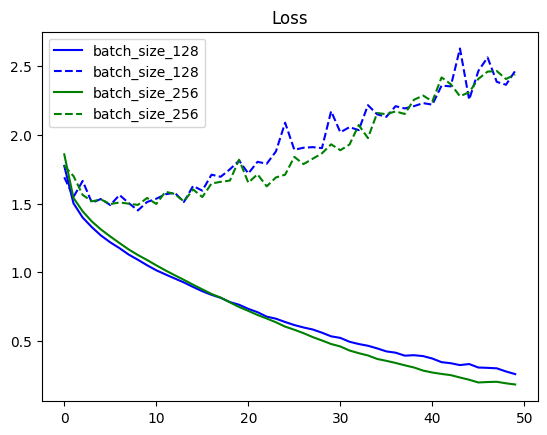

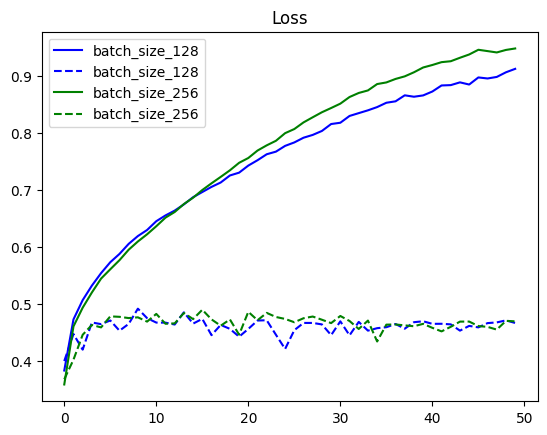

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
col_bar=["b","g","r","c","m"]
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_loss"])), results[cond]["train_loss"],"-",label=cond,c=col_bar[i])
    plt.plot(range(len(results[cond]["val_loss"])), results[cond]["val_loss"],"--",label=cond,c=col_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train_acc"])), results[cond]["train_acc"],"-",label=cond,c=col_bar[i])
    plt.plot(range(len(results[cond]["val_acc"])), results[cond]["val_acc"],"--",label=cond,c=col_bar[i])
plt.title("Loss")
plt.legend()
plt.show()